# Recurrent Neural Network

## Part 1 - Data Preprocessing

### Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the training set

In [51]:
dataset = pd.read_csv('BTCUSD_1hr.csv')
dataset=dataset.iloc[39465::-1, 3:4].values

training_set = dataset[0:39465-60, :]

[[   0.  ]
 [ 245.  ]
 [ 245.  ]
 ...
 [7337.19]
 [7367.28]
 [7369.6 ]]


### Feature Scaling

In [52]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

### Creating a data structure with 60 timesteps and 1 output

In [53]:
X_train = []
y_train = []
for i in range(60, 39405):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

### Reshaping

In [54]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

## Part 2 - Building and Training the RNN

### Importing the Keras libraries and packages

In [57]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

### Initialising the RNN

In [58]:
regressor = Sequential()

### Adding the first LSTM layer and some Dropout regularisation

In [59]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

### Adding a second LSTM layer and some Dropout regularisation

In [60]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a third LSTM layer and some Dropout regularisation

In [61]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a fourth LSTM layer and some Dropout regularisation

In [62]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

### Adding the output layer

In [63]:
regressor.add(Dense(units = 1))

### Compiling the RNN

In [64]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

### Fitting the RNN to the Training set

In [65]:
regressor.fit(X_train, y_train, epochs = 10, batch_size = 32)

Epoch 1/10
1230/1230 [==============================] - 21s 13ms/step - loss: 0.0033
Epoch 2/10
1230/1230 [==============================] - 16s 13ms/step - loss: 6.1741e-04
Epoch 3/10
1230/1230 [==============================] - 16s 13ms/step - loss: 4.7752e-04
Epoch 4/10
1230/1230 [==============================] - 16s 13ms/step - loss: 4.6146e-04
Epoch 5/10
1230/1230 [==============================] - 16s 13ms/step - loss: 4.2412e-04
Epoch 6/10
1230/1230 [==============================] - 16s 13ms/step - loss: 3.7820e-04
Epoch 7/10
1230/1230 [==============================] - 16s 13ms/step - loss: 4.0567e-04
Epoch 8/10
1230/1230 [==============================] - 16s 13ms/step - loss: 3.7483e-04
Epoch 9/10
1230/1230 [==============================] - 16s 13ms/step - loss: 3.6978e-04
Epoch 10/10
1230/1230 [==============================] - 16s 13ms/step - loss: 3.7057e-04


## Part 3 - Making the predictions and visualising the results

### Getting the real stock price of 2017

In [69]:

real_bitcoin_price = dataset[39405:, :]
test_set = dataset[39405:, :]
print(real_bitcoin_price)

[[7141.78]
 [7108.6 ]
 [7110.62]
 [7153.28]
 [7158.17]
 [7224.06]
 [7254.65]
 [7277.49]
 [7230.95]
 [7295.45]
 [7275.74]
 [7336.96]
 [7376.47]
 [7352.78]
 [7318.08]
 [7329.68]
 [7248.02]
 [7284.33]
 [7311.92]
 [7389.73]
 [7366.26]
 [7385.46]
 [7441.26]
 [7392.36]
 [7344.87]
 [7363.23]
 [7287.28]
 [7331.78]
 [7377.05]
 [7362.06]
 [7312.48]
 [7296.24]
 [7127.08]
 [7182.  ]
 [7170.01]
 [7201.81]
 [7156.81]
 [7161.89]
 [7277.05]
 [7355.98]
 [7358.96]
 [7414.75]
 [7315.76]
 [7323.36]
 [7288.12]
 [7307.84]
 [7252.69]
 [7295.8 ]
 [7285.  ]
 [7221.77]
 [7269.64]
 [7283.45]
 [7337.55]
 [7314.15]
 [7324.32]
 [7320.11]
 [7327.7 ]
 [7337.19]
 [7367.28]
 [7369.6 ]]


### Getting the predicted stock price of 2017

In [72]:
dataset_total = np.concatenate((training_set, test_set), axis = 0)
inputs = dataset_total[len(dataset_total) - len(test_set) - 60:]
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 120):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_bitcoin_price = regressor.predict(X_test)
predicted_bitcoin_price = sc.inverse_transform(predicted_bitcoin_price)
print(predicted_bitcoin_price)

[[7102.291 ]
 [7124.3706]
 [7142.9775]
 [7157.5737]
 [7171.576 ]
 [7185.79  ]
 [7203.8145]
 [7226.222 ]
 [7251.414 ]
 [7272.8057]
 [7292.63  ]
 [7309.6978]
 [7327.628 ]
 [7348.8496]
 [7369.728 ]
 [7385.2964]
 [7395.8086]
 [7397.0913]
 [7393.6885]
 [7391.1196]
 [7396.234 ]
 [7406.169 ]
 [7418.466 ]
 [7434.419 ]
 [7448.5327]
 [7455.3145]
 [7456.721 ]
 [7450.289 ]
 [7441.666 ]
 [7437.354 ]
 [7436.937 ]
 [7435.156 ]
 [7429.7437]
 [7410.199 ]
 [7383.5527]
 [7356.0527]
 [7333.787 ]
 [7314.944 ]
 [7298.92  ]
 [7293.2896]
 [7302.322 ]
 [7321.1206]
 [7346.725 ]
 [7367.099 ]
 [7379.5913]
 [7383.6167]
 [7383.607 ]
 [7379.0337]
 [7374.804 ]
 [7372.1294]
 [7366.58  ]
 [7361.4087]
 [7358.9385]
 [7362.6055]
 [7369.1953]
 [7376.58  ]
 [7382.9985]
 [7388.346 ]
 [7393.338 ]
 [7400.1104]]


### Visualising the results

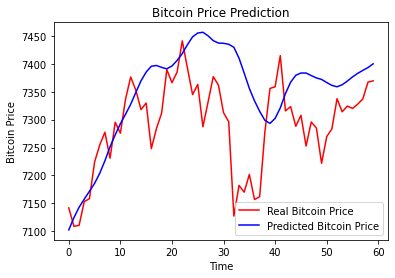

In [73]:
plt.plot(real_bitcoin_price, color = 'red', label = 'Real Bitcoin Price')
plt.plot(predicted_bitcoin_price, color = 'blue', label = 'Predicted Bitcoin Price')
plt.title('Bitcoin Price Prediction')
plt.xlabel('Time')
plt.ylabel('Bitcoin Price')
plt.legend()
plt.show()